In [1]:
from __future__ import division, print_function

# For reloading external modules
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib
import numpy as np

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet import image_util

In [3]:
nx = 640
ny = 360

In [4]:
generator = image_util.ImageDataProvider(
    labels_path='training_data/3_cl', 
    images_path='F:/MOY_PhD_DATA_LOCAL/2017_watsen/data/frames', 
    randomize=True, mask_suffix='.tiff', label_validity=8)


training_data/3_cl\*.tiff
Number label files found: 31
Number of files used: 255


In [5]:
net = unet.Unet(channels=3, n_class=3, layers=5, features_root=16, cost_kwargs=dict(class_weights=[1,1,1]))

2017-10-06 15:15:22,858 Layers 5, features 16, filter size 3x3, pool size: 2x2


In [6]:
trainer = unet.Trainer(net, optimizer="adam", batch_size=4)

In [7]:
path = trainer.train(generator, "./unet_trained/v8_b4_ly5", training_iters=200, epochs=40, display_step=50, restore=False, write_graph=True)

2017-10-06 15:15:26,761 Removing 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\prediction'
2017-10-06 15:15:26,960 Removing 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\unet_trained\v8_b4_ly5'
2017-10-06 15:15:26,961 Allocating 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\prediction'
2017-10-06 15:15:26,967 Allocating 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\unet_trained\v8_b4_ly5'
C:\Users\moydevma\AppData\Roaming\Python\Python35\site-packages\tf_unet-0.1.0-py3.5.egg\tf_unet\image_util.py:75: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if label == '':
C:\Users\moydevma\AppData\Roaming\Python\Python35\site-packages\tf_unet-0.1.0-py3.5.egg\tf_unet\image_util.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wi

2017-10-06 15:38:12,606 Verification error= 13.4%, loss= 0.1385
2017-10-06 15:38:25,890 Iter 2400, Minibatch Loss= 0.1764, Training Accuracy= 0.9424, Minibatch error= 9.7%
2017-10-06 15:38:59,052 Iter 2450, Minibatch Loss= 0.0559, Training Accuracy= 0.9770, Minibatch error= 8.7%
2017-10-06 15:39:31,767 Iter 2500, Minibatch Loss= 0.0982, Training Accuracy= 0.9555, Minibatch error= 10.7%
2017-10-06 15:40:04,412 Iter 2550, Minibatch Loss= 0.0781, Training Accuracy= 0.9738, Minibatch error= 5.6%
2017-10-06 15:40:35,952 Epoch 12, Average loss: 0.0166, learning rate: 0.0010
2017-10-06 15:40:36,049 Verification error= 12.8%, loss= 0.0819
2017-10-06 15:40:50,160 Iter 2600, Minibatch Loss= 0.0306, Training Accuracy= 0.9876, Minibatch error= 6.4%
2017-10-06 15:41:23,704 Iter 2650, Minibatch Loss= 0.0834, Training Accuracy= 0.9682, Minibatch error= 6.6%
2017-10-06 15:41:57,316 Iter 2700, Minibatch Loss= 0.1228, Training Accuracy= 0.9473, Minibatch error= 12.4%
2017-10-06 15:42:31,177 Iter 2750, M

FailedPreconditionError: Failed to rename: ./unet_trained/v8_b4_ly5\model.cpkt.meta.tmpd31e221c6fc0475b95174b6fb811ef99 to: ./unet_trained/v8_b4_ly5\model.cpkt.meta : The process cannot access the file because it is being used by another process.


In [9]:
x_test, y_test, names = generator(9)

prediction = net.predict("./unet_trained/v8_b4_ly5/model.cpkt", x_test)




C:\Users\moydevma\AppData\Roaming\Python\Python35\site-packages\tf_unet-0.1.0-py3.5.egg\tf_unet\image_util.py:75: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if label == '':
C:\Users\moydevma\AppData\Roaming\Python\Python35\site-packages\tf_unet-0.1.0-py3.5.egg\tf_unet\image_util.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labels != '':
C:\Users\moydevma\AppData\Roaming\Python\Python35\site-packages\tf_unet-0.1.0-py3.5.egg\tf_unet\image_util.py:103: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labels != '':


INFO:tensorflow:Restoring parameters from ./unet_trained/v8_b4_ly5/model.cpkt


2017-10-09 08:41:29,630 Restoring parameters from ./unet_trained/v8_b4_ly5/model.cpkt
2017-10-09 08:41:35,130 Model restored from file: ./unet_trained/v8_b4_ly5/model.cpkt


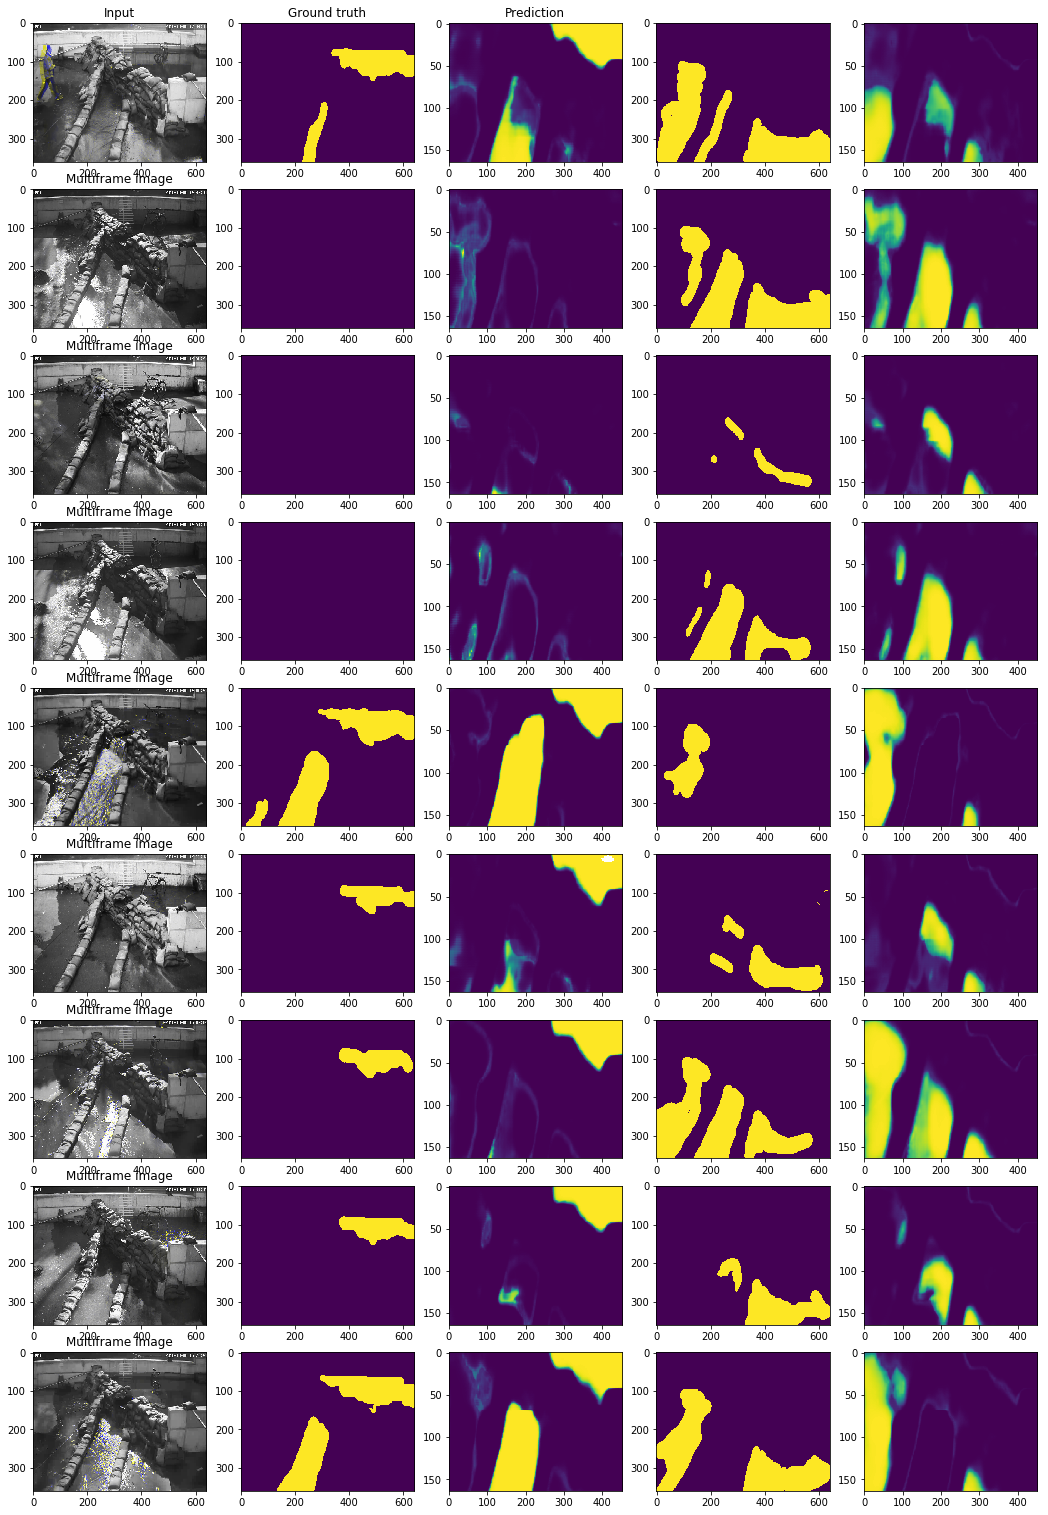

In [10]:
fig, ax = plt.subplots(9, 5, sharex=False, sharey=False, figsize=(18,27))
for i in range(0,9):
    ax[i,0].set_title('Multiframe image')
    ax[i, 0].imshow(x_test[i,...], aspect="auto")
    ax[i, 1].imshow(y_test[i,...,1], aspect="auto")
    mask = prediction[i,...,1]#>0.8
    ax[i, 2].imshow(mask, aspect="auto")
    
    ax[i, 3].imshow(y_test[i,...,2], aspect="auto")
    mask = prediction[i,...,2]#>0.8
    ax[i, 4].imshow(mask, aspect="auto")
ax[0,0].set_title("Input")
ax[0,1].set_title("Ground truth")
ax[0,2].set_title("Prediction")